# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
# This caused errors, so will just use the default versions included in the Colab environment
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
# cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
# google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/Personal/UT Austin/Project 1 - Python Foundations/foodhub_order.csv')

In [4]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# checking shape of the data, number of rows and columns
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Display the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 4 of the colums are of type integer, 1 column is floating point, while 4 of type object (string).


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#Count the number of missing values in each of the columns
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: Based on the above, we see that there are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Let's check the statistical summary of the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: Based on the above, we see that for the food prepration time, we have a minimum of 20, average of 27.4, and maximum of 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of rows(orders) where rating = 'Not given'
print("The number orders where there was no rating is ", data[data['rating'] == 'Not given'].shape[0], ".", sep='')

The number orders where there was no rating is 736.


#### Observations: The number of orders where the was no rating is 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

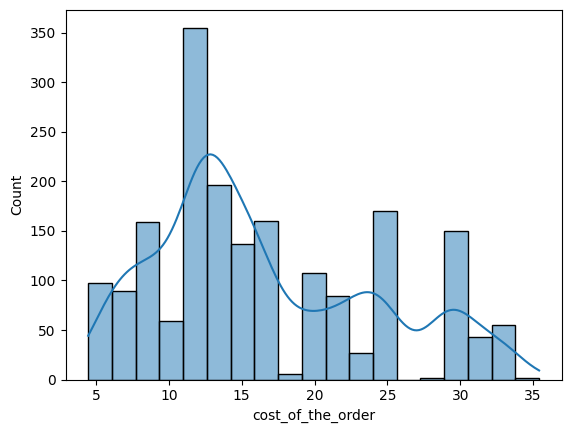

In [ ]:
# Let's start with histograms and boxplots of the numeric values: cost_of_the_order, food_preparation_time, and	delivery_time
sns.histplot(data=data, x='cost_of_the_order', kde=True);

Based on the histogram we can see that there is a higher volume of orders that are moderately priced with relatively fewer orders the more expensive, where the histogram is right-skewed.    

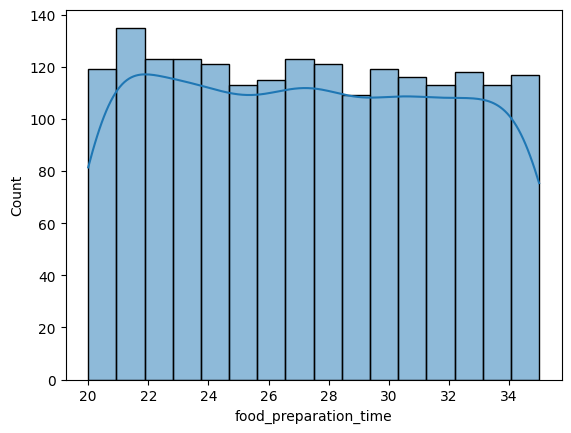

In [ ]:
#Historgram, but with bin size set to width of 1 minute

sns.histplot(data=data, x='food_preparation_time', bins=16, kde=True);

The food preparation time is quite interesting in that it's nearly flat, meaning the order volume is nearly identical no matter how long it takes to prepare the food.  One might think that for items that take a long time to prepare, there would be fewer of those orders, but instead the data reflects an unexpected eveness.

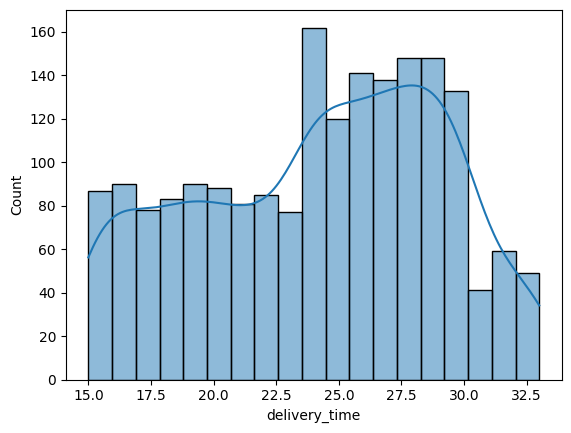

In [ ]:
#Histogram of delivery time
sns.histplot(data=data, x='delivery_time', bins=19, kde=True);

Here we can see there is a higher volume of orders for the longer delivery times.  This could be expected when considering there is a higher volume of potential customers the further away from the restaurant.

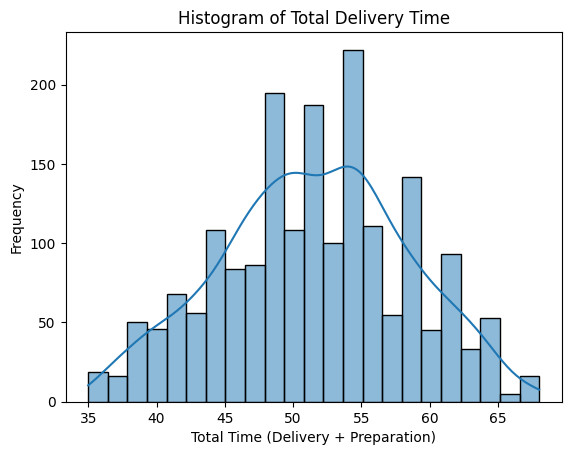

In [44]:
#Lets also do a histogram of the total delivery time which is prep time + delivery time
# Create a histogram of the sum of 'delivery_time' and 'food_preparation_time'
sns.histplot(data=data, x=data['delivery_time'] + data['food_preparation_time'], kde=True)

# Add labels and title
plt.xlabel('Total Time (Delivery + Preparation)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Delivery Time')

# Show the plot
plt.show()

####The histogram of the total delivery time is quite interesting, given that the component times are seemingly flat.  This appears to be the Central Limit Theorem at work, where the distribution of a sum of a large number of independent, identically distributed variables will approximate to normal, regardless of the distribution of the original variables.

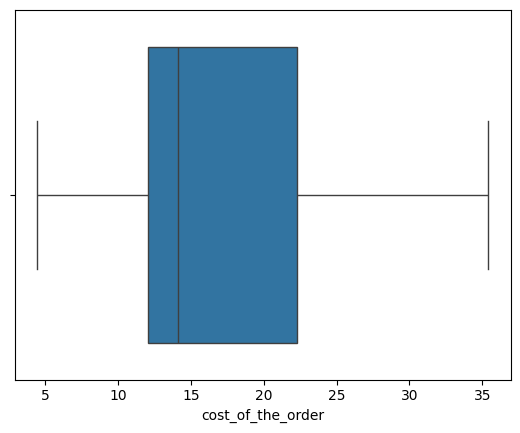

In [ ]:
#Now let's look at some box plots to better understand the distribution of the numeric data
#Boxplot for cost_of_the_order
sns.boxplot(data=data, x='cost_of_the_order');

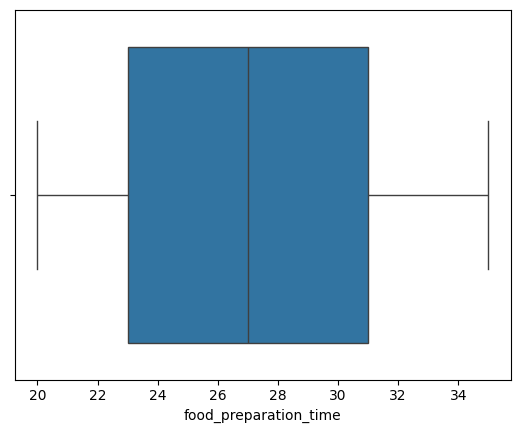

In [ ]:
#Boxplot for food_preparation_time
sns.boxplot(data=data, x='food_preparation_time');

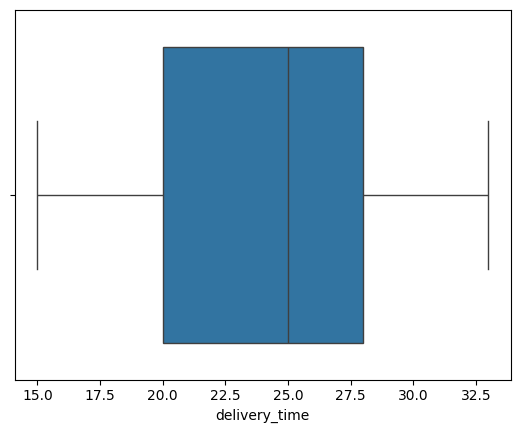

In [ ]:
#Boxplot for delivery_time
sns.boxplot(data=data, x='delivery_time');

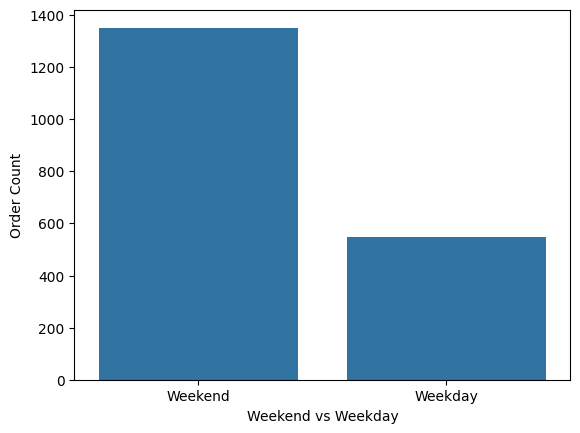

In [ ]:
#To understand the categorical data we can use countplots
#Lets start with a count plot showing the number of orders by day_of_the_week
sns.countplot(data=data, x='day_of_the_week')
plt.ylabel('Order Count')
plt.xlabel('Weekend vs Weekday')
plt.show()


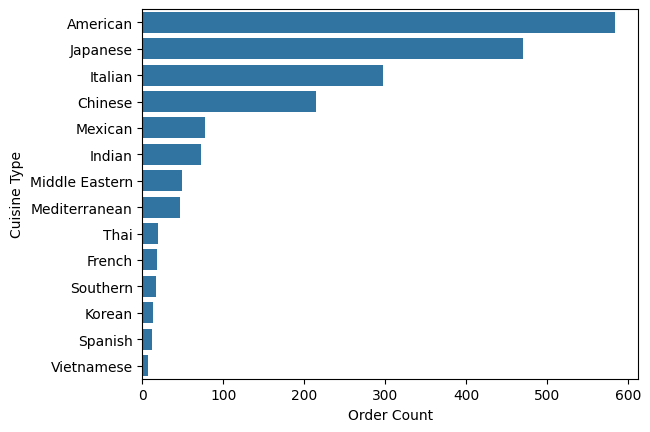

In [ ]:
#Now lets get a count of orders by cusine type, rank ordered from most to least popular based on # of orders
sns.countplot(data=data, y='cuisine_type', order=data['cuisine_type'].value_counts().index)
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.show()

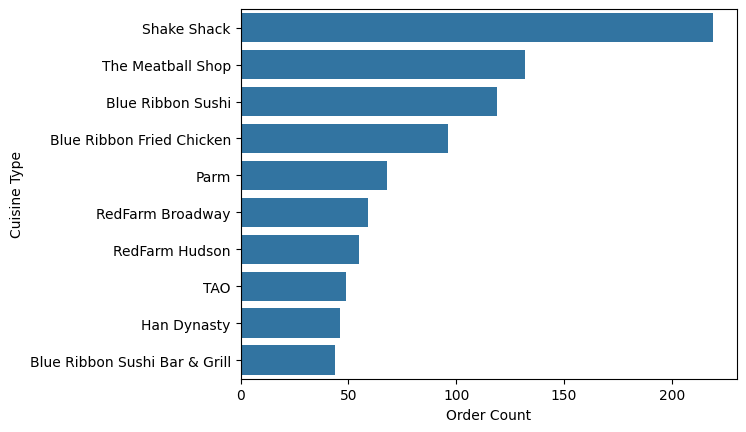

In [ ]:
#Now let's get a countplot of the top 10 restaurants based on total # of orders
sns.countplot(data=data, y='restaurant_name', order=data['restaurant_name'].value_counts().head(10).index)
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.show()

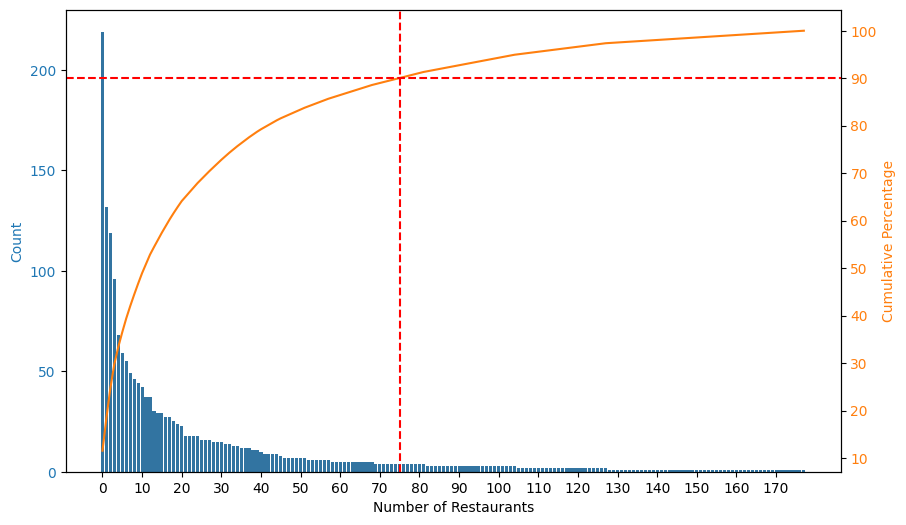

In [38]:
#Let's create a pareto chart showing the order volume vs restaurant to see what percentage
#of the cumulative orders are generated by how many restaurants

#Count the occurrences of each restaurant name
restaurant_counts = data['restaurant_name'].value_counts()

#Sort these counts in descending order
sorted_counts = restaurant_counts.sort_values(ascending=False)

#Calculate the cumulative percentage
cumulative_percentage = sorted_counts.cumsum() / sorted_counts.sum() * 100

#Plot the bars for the counts and add a line for the cumulative percentage
fig, ax1 = plt.subplots(figsize=(10, 6))

#Create the bar plot
sns.barplot(x=np.arange(len(sorted_counts)), y=sorted_counts, ax=ax1, color='C0')
ax1.set_xlabel('Number of Restaurants')
ax1.set_ylabel('Count', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Set x-axis ticks and labels in units of 10
xticks = np.arange(0, len(sorted_counts), 10)
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_counts)), cumulative_percentage, color='C1')
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

#Add a flat reference line at 90%
ax2.axhline(y=90, color='red', linestyle='--')

#Find the index where the cumulative percentage first equals or exceeds 90%
threshold_index = np.where(cumulative_percentage >= 90)[0][0]

#Add a vertical line at the threshold index
ax2.axvline(x=threshold_index, color='red', linestyle='--')

# Show the plot
plt.show()


####Here we can see that 90% of the order volume comes from the top 75 restaurants, with around the next 100 restaurants only generating the remaining 10%.

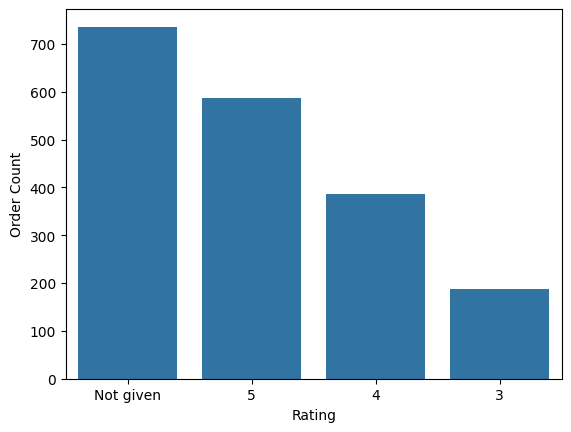

In [21]:
#Now let's get a distrbution of the rating by plotting the order count vs rating sorted from higest to lowest
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.xlabel('Rating')
plt.ylabel('Order Count')
plt.show()

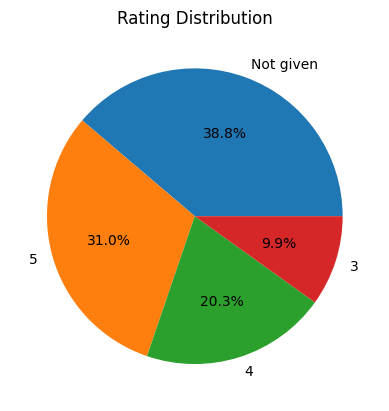

In [28]:
# Let's also do a pie chart showing the percentage of times each rating occurs
rating_counts = data['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Rating Distribution')
plt.show()

####Here we can see that very often (~40%), no rating is given.  When a rating is given, people tend to give a high rating of 5, followed by 4, and then 3.

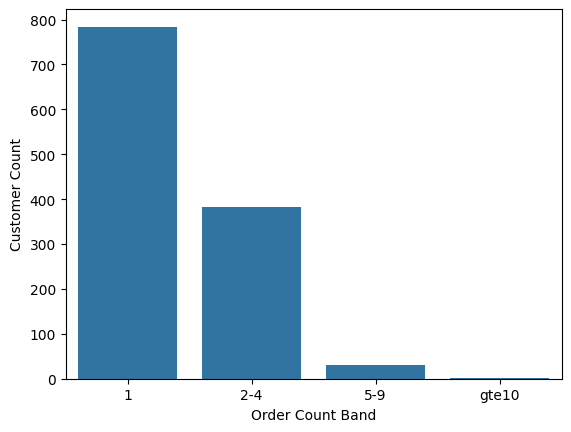

In [42]:
#Let's try to understand the makeup of the customers based on how many orders they've placed.
#First create a dataframe which is customer_id with sum of orders
customer_order_count = data.groupby('customer_id').size().reset_index(name='order_count')
customer_order_count.head()

#Now tag each customer by count band: 1 order, 2-4 orders, 5-9 orders, >= 10 orders
def categorize_order_count(count):
    if count == 1:
        return "1"
    elif 2 <= count <= 4:
        return "2-4"
    elif 5 <= count <= 9:
        return "5-9"
    elif count >= 10:
        return "gte10"
    else:
        return "Undefined"

# Apply the function to the 'order_count' column to create a new 'band' column
customer_order_count['band'] = customer_order_count['order_count'].apply(categorize_order_count)

#Now do a seaborn bar chart of count of customer_id vs band
sns.countplot(data=customer_order_count, x='band')
plt.xlabel('Order Count Band')
plt.ylabel('Customer Count')
plt.show()


#####Here we can see our customer base is dominated by single order customers and very few high volume customers.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Find the top 5 restauants (restaurant_name) which have the highest number of rows (orders)
data['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
#Find the top 5 restauants (restaurant_name) which have the highest number of rows (orders), but as a percentage of all rows
(data['restaurant_name'].value_counts(normalize=True).head(5)*100).round(1)

Shake Shack                  11.5
The Meatball Shop             7.0
Blue Ribbon Sushi             6.3
Blue Ribbon Fried Chicken     5.1
Parm                          3.6
Name: restaurant_name, dtype: float64

#### Observations: Shake Shack has the most number of orders, 219, which represents 11.5% of all orders.  2nd is The Meatball Shop with 132 orders (7.0%), 3rd is Blue Ribbon Sushi with 119 orders (6.3%), 4th is Blue Ribbon Fried Chicken with 96 orders (5.1%), and 5th is Parm with 68 orders (3.6%).


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the DataFrame for weekends
weekend_data = data[data['day_of_the_week'] == 'Weekend']

# Group by 'cuisine_type' and count the number of occurrences
cuisine_counts = weekend_data['cuisine_type'].value_counts()

print("The most popular cuisine type on weekends is ", cuisine_counts.idxmax(), ".", sep='')


The most popular cuisine type on weekends is American.


#### Observations: The most popular cuisine type on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Count the number of orders with cost more than $20
orders_above_20 = data[data['cost_of_the_order'] > 20].shape[0]

# Count the total number of orders
total_orders = data.shape[0]

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Print the result
print("The percentage of orders that cost more than $20 is {:.1f}%.".format(percentage_above_20))

The percentage of orders that cost more than $20 is 29.2%.


#### Observations: The percentage of orders that cost more than $20 is 29.2%.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean value for delivery_time
mean_delivery_time = data['delivery_time'].mean()

# Print the result
print(f"The mean value for delivery time is {mean_delivery_time:.1f}", "minutes.")

The mean value for delivery time is 24.2 minutes.


#### Observations: The mean value for delivery time is 24.2 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group by 'customer_id' and count the number of orders
order_counts = data.groupby('customer_id').size()

# Sort the counts in descending order and get the top 3
top_customers = order_counts.sort_values(ascending=False).head(3)

# Convert the series to a DataFrame with appropriate column names
top_customers_df = top_customers.reset_index(name='order count')
top_customers_df.rename(columns={'customer_id': 'customer_id'}, inplace=True)

# Print the DataFrame
print("Top 3 customers based on number of orders:")
print(top_customers_df.to_string(index=False))

Top 3 customers based on number of orders:
 customer_id  order count
       52832           13
       47440           10
       83287            9


#### Observations: The top 3 customers based on number of orders is as follows: 1) customer_id 52832 with 13 orders, 2) customer_id 47440 with 10 orders, and 3) customer_id 83287 with 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


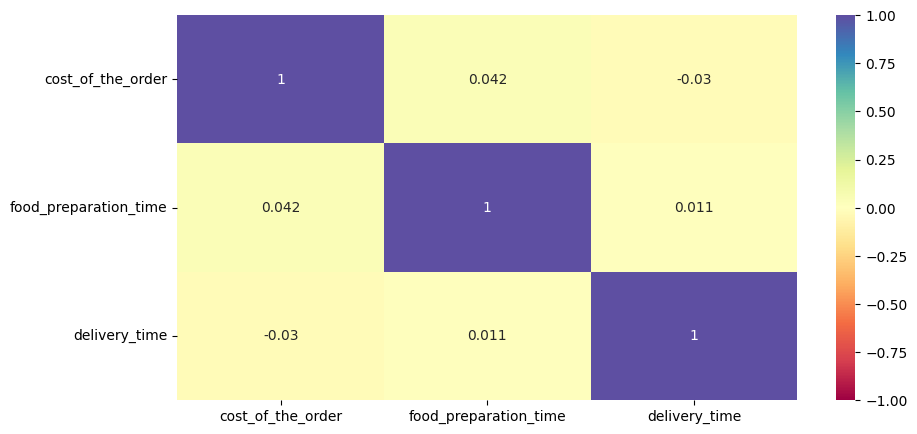

In [6]:
# The following are the numerical values to explore: cost_of_the_order, food_preparation_time, and delivery_time
# Select only select columns cost_of_the_order, food_preparation_time, and delivery_time from data
numeric_data = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

# Compute the correlation matrix for numeric columns only
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()


####From the above correlation matrix, it appears that none of the numeric values have any signficant correlation, which largely makes sense empirically.  We wouldn't expect the food prepration time to have anything to do with the delivery time.  One might think that the longer it takes to prepare an item, the more expensive it would be, so that does have the highest correlation, but it's still very small.

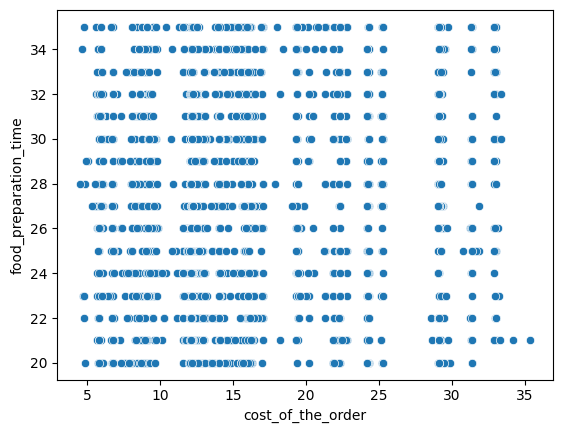

In [7]:
#Scatter Plots to visually show the lack of correlation
#Create a scatter plot of cost_of_order vs food_preparation_time
sns.scatterplot(data=data, x='cost_of_the_order', y='food_preparation_time');

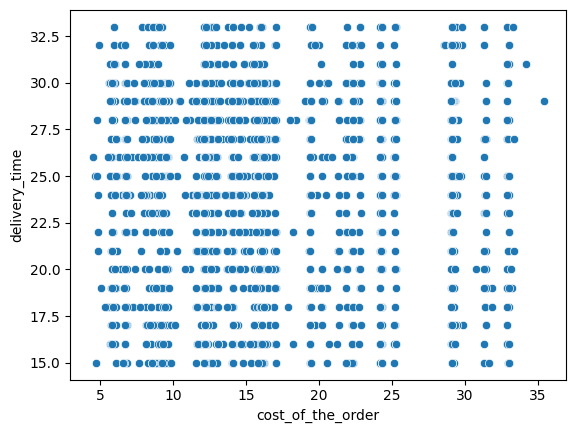

In [8]:
#Create a scatter plot of cost_of_order vs delivery_time
sns.scatterplot(data=data, x='cost_of_the_order', y='delivery_time');

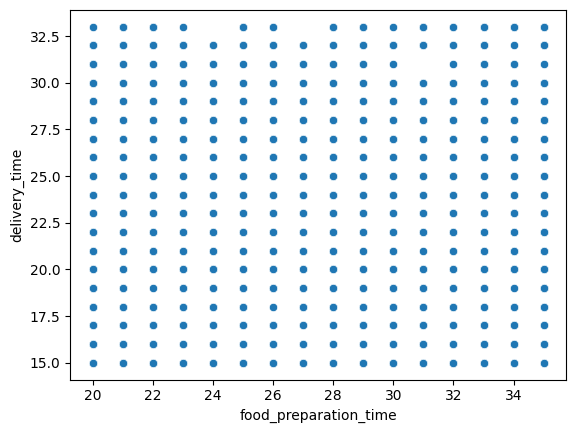

In [9]:
#Create a scatter plot of food_preparation_time vs delivery_time
sns.scatterplot(data=data, x='food_preparation_time', y='delivery_time');

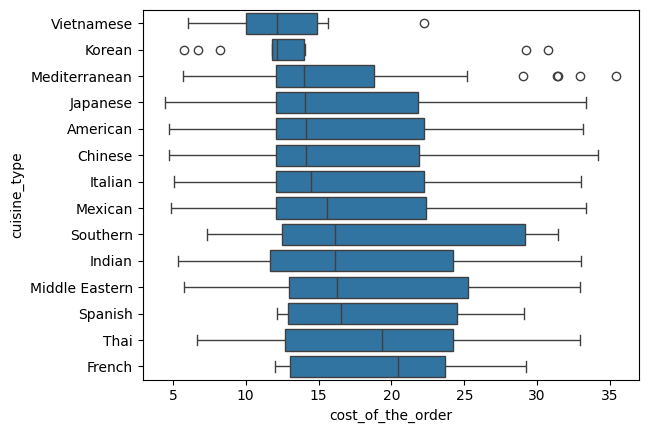

In [12]:
#We can also examine some of the numeric values against categorical variables
#Start with a box plot of cost_of_order vs cuisine_type
# Calculate the median values for each cuisine type
median_order_costs = data.groupby('cuisine_type')['cost_of_the_order'].median().sort_values()

# Order the cuisine types by median cost
ordered_cuisines = median_order_costs.index

# Create the boxplot with the specified order and rotate it by switching x and y
sns.boxplot(data=data, y='cuisine_type', x='cost_of_the_order', order=ordered_cuisines)

# Show the plot
plt.show()

####From the above boxplot we can see that Vietnamese has the lowest median cost, while French has the highest.  Vietnamese, Korean, and Mediterranean have outlier values.  Southern has the largest inter-quartile range by far.

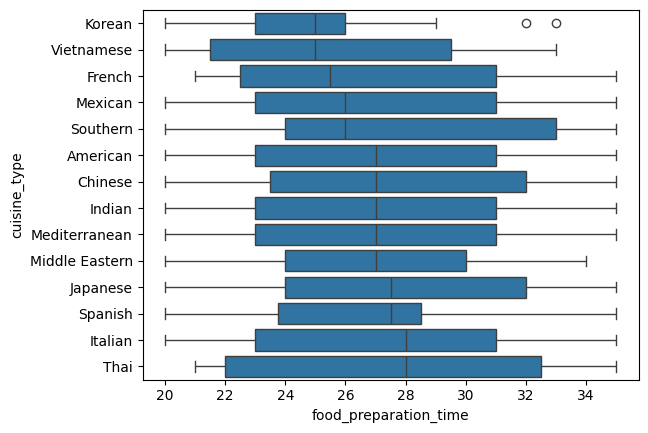

In [13]:
#Now let's look at food_preparation_time vs cuisine_type
# Calculate the median values for each cuisine type
median_food_prep = data.groupby('cuisine_type')['food_preparation_time'].median().sort_values()

# Order the cuisine types by median food prep time
ordered_cuisines = median_food_prep.index

# Create the boxplot with the specified order and rotate it by switching x and y
sns.boxplot(data=data, y='cuisine_type', x='food_preparation_time', order=ordered_cuisines)

# Show the plot
plt.show()

####From the above box plot we can see that Korean and Vietnamese have the lowest median food prep times, while Thai and Italian have the highest.  There are also quite a few cuisines which have nearly identical median prep times, namely American through to Middle Eastern in the above chart.

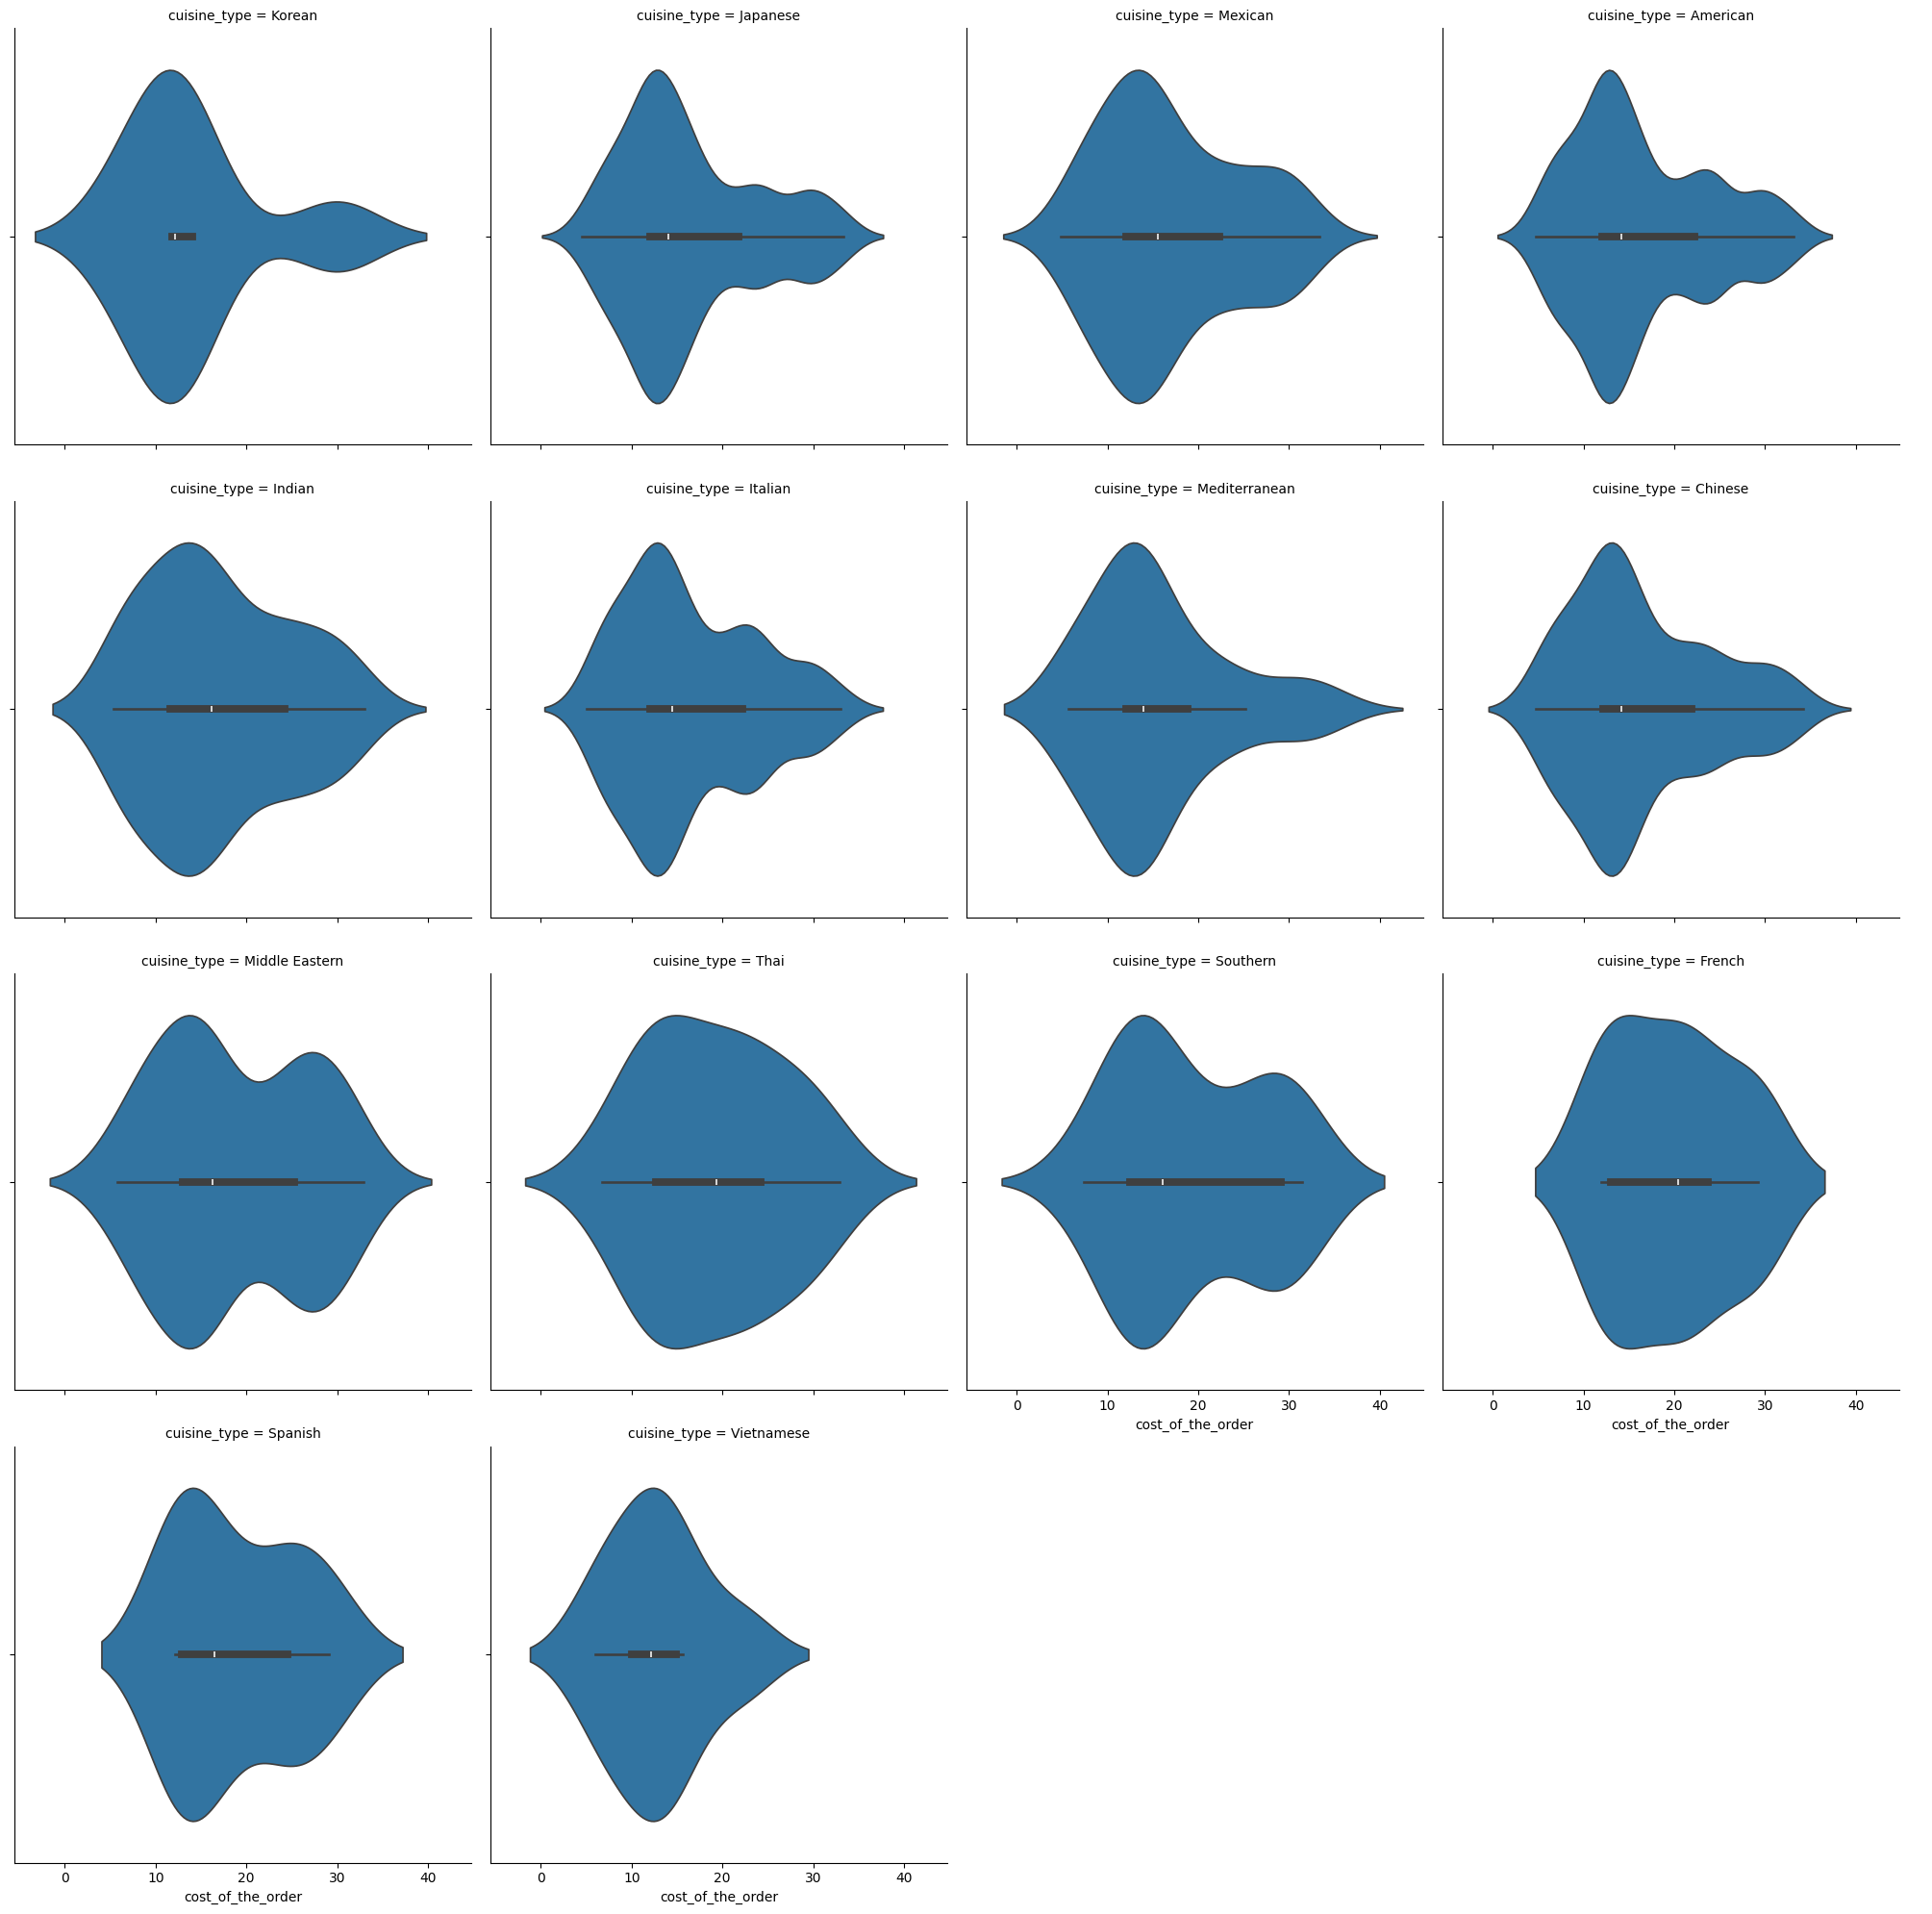

In [14]:
# Finally lets look at violin plots of cost_of_order vs cusine_type

sns.catplot(x='cost_of_the_order',
            col='cuisine_type',
            data=data,
            col_wrap=4,
            kind="violin")
plt.show()

####From the above violin plots we can see that most cuisine types have a smooth density of price with a single peak whereas a few cuisine types shows multiple peaks indicating some distinct pricing bands, e.g., Middle Eastern and Southern.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [15]:
# First exlcude any rows where rating = 'Not given' and store results in a new temp dataframe
data_temp = data[data['rating'] != 'Not given'].copy()

#Convert rating to type integer
data_temp['rating'] = data_temp['rating'].astype(int)

# Create a second temp dataframe which is the restaurant_name and sum of rows
data_temp2 = data_temp.groupby('restaurant_name').size().reset_index(name='rating_count').copy()

# Filter this dataframe for rows where rating_count > 50
data_temp2 = data_temp2[data_temp2['rating_count'] > 50]

# Create a third temp dataframe which is the restaurant_name and mean of rating
data_temp3 = data_temp.groupby('restaurant_name')['rating'].mean().reset_index(name='avg_rating')
#data_temp3.head()
# Left join data_temp3 onto data_temp2
data_temp2 = data_temp2.merge(data_temp3, on='restaurant_name', how='left')

# Filter data_temp2 for rows where avg_rating > 4
data_temp2 = data_temp2[data_temp2['avg_rating'] > 4]

# Print the results
data_temp2

,restaurant_name,rating_count,avg_rating
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations: There are four restaurants which meet the criteria for the promotional offer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [19]:
#To answer this question add a new column to the dataframe which is the company_charge

#Define the conditions and choices for the company charge
conditions = [
    data['cost_of_the_order'] > 20,
    data['cost_of_the_order'] > 5
]
choices = [
    0.25 * data['cost_of_the_order'],
    0.15 * data['cost_of_the_order']
]

#Apply the conditions and choices
data['company_charge'] = np.select(conditions, choices, default=0)

#Compute the total value of company_charge
data['company_charge'].sum()

6166.303

#### Observations: The net revenue generated by the company across all orders is $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Count the number of orders that take more than 60 minutes to deliver (food prep time + delivery time)
orders_over_60 = ((data['food_preparation_time'] + data['delivery_time']) > 60).sum()

# Count the total number of orders
total_orders = data.shape[0]

# Calculate the percentage
percentage_above_60 = (orders_over_60 / total_orders) * 100

# Print the result
print("The percentage of orders take more than 60 minutes to deliver is {:.1f}%.".format(percentage_above_60))

The percentage of orders take more than 60 minutes to deliver is 10.5%.


#### Observations: The percentage of orders take more than 60 minutes to deliver is 10.5%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
mdt_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mdt_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the result
print(f"The mean delivery time on weekdays is {mdt_weekday:.1f} minutes.")
print(f"The mean delivery time on weekends is {mdt_weekend:.1f} minutes.")

if mdt_weekday > mdt_weekend:
    print(f"The mean delivery time on weekdays is {mdt_weekday - mdt_weekend:.1f} minutes longer than on weekends.")
else:
    print(f"The mean delivery time on weekends is {mdt_weekend - mdt_weekday:.1f} minutes longer than on weekdays.")


The mean delivery time on weekdays is 28.3 minutes.
The mean delivery time on weekends is 22.5 minutes.
The mean delivery time on weekdays is 5.9 minutes longer than on weekends.


#### Observations:
The mean delivery time on weekdays is 28.3 minutes.<br>
The mean delivery time on weekends is 22.5 minutes.<br>
The mean delivery time on weekdays is 5.9 minutes longer than on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Generally speaking there is no correlation between the numeric data, namely order cost, food prep time, and delivery time.
* Weekend orders dominate the volume compared to weekday with over double the orders on weekends.  And considering a weekend is only 2 days versus 5 for weekday, the order volume per day is even more exaggerated.
*  Delivery time appears to occur in two evenly distributed bands of 15-23 minutes, then 23-30 minutes of distinctly higher frequency.  This might be because restaurants are located in distinct commercial zones with less dense residential, while once out of the commercial zone around 23 minutes, the residential density is higher resulting in higher order volume.
* Order volume is dominated by the top 6-8 cuisines types, with the bottom 6 representing very few orders.
* Customer base is dominated by single order customers.
* A dominate number of the orders have No Rating.  

### Recommendations:

*  ~40% of orders have 'No Rating', so it would be good to find way to incentivize customers to provide a rating, such as perhaps a discount on their next order or entered in a chance to win a free meal that's drawn weekly.
* 90% of the order volume comes from the top 75 restaurants, with around 100 restaurants making up the remaining 10%.  If there is any overhead cost of including a restaurant in the FoodHub app might consider dropping restaurants which contribute almost no order volume.
* Orders under \$20 make up a substantial portion of the order volume.  This could be because, people are relucant to spend more than that amount, however, it also coincidental that the FoodHub charge increases from 15% to 25% when orders exceed $20. It may be worth switching to a flat 15% for all orders and see if volume increases on the higher end resulting in a net increase in revenue.
* The weekend versus weekday ordering is highly skewed toward weekend, so some steps might be taken to boost weekday ordering, such as having lower rates for weekday orders.
* Now that the most popular cuisine types are well understood, survey the list of restaurants offering these type of cuisines, but aren't enrolled in the FoodHub app.  Try to onboard these additional missing, but popular food type restaurants.
* The customer based is highly dominated by customers which only placed a single order and there are very few high volume customers.  Consider adding some type of customer loyalty program to incentivize customers to continue placing orders such as 50% off an order after every N number of orders placed.

---